In [29]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [30]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [31]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [56]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE

# Set timeframe to '1D'
timeframe = '1D'

start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data
df = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head(20)

,AGG,SPY
,close,close
time,,
2019-01-02 00:00:00-05:00,106.5850,249.8900
2019-01-03 00:00:00-05:00,107.0200,244.4600
2019-01-04 00:00:00-05:00,106.6950,252.4100
2019-01-07 00:00:00-05:00,106.4700,254.4000
2019-01-08 00:00:00-05:00,106.4200,256.6500
2019-01-09 00:00:00-05:00,106.4800,257.7100
2019-01-10 00:00:00-05:00,106.3850,258.9400
2019-01-11 00:00:00-05:00,106.5600,258.7600


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [57]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = df.pct_change()
daily_returns.head(20)

,AGG,SPY
,close,close
time,,
2019-01-02 00:00:00-05:00,NaN,NaN
2019-01-03 00:00:00-05:00,0.004081,-0.021730
2019-01-04 00:00:00-05:00,-0.003037,0.032521
2019-01-07 00:00:00-05:00,-0.002109,0.007884
2019-01-08 00:00:00-05:00,-0.000470,0.008844
2019-01-09 00:00:00-05:00,0.000564,0.004130
2019-01-10 00:00:00-05:00,-0.000892,0.004773
2019-01-11 00:00:00-05:00,0.001645,-0.000695


In [34]:
# Calculate volatility
# YOUR CODE HERE
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg

0.00021276976507473064

In [35]:
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_agg

0.0020886019741764646

In [36]:
# Save the last day's closing price
# YOUR CODE HERE
agg_last_price = df['AGG']['close'][-1]
spy_last_price = df['SPY']['close'][-1]
agg_last_price

112.37

In [58]:
# Setup the Monte Carlo Parameters
# Set number of simulations and trading days
num_simulations = 500
num_trading_days = 252 * 30

# Set last closing prices of `AGG` and `SPY`
agg_last_price = df['AGG']['close'][-1]
spy_last_price = df['SPY']['close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `500` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of `AGG` and `SPY`
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 * 30 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.4, 0.6]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head(20)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996843,0.999008,0.995367,1.000397,1.012342,1.010130,0.996505,1.000728,1.010624,1.012490,...,0.998484,1.007499,1.010418,1.003011,0.991617,0.996755,1.007782,1.002387,0.994367,0.997020
2,0.999043,0.999024,0.996192,1.005303,1.008837,1.006938,0.995248,0.998291,1.019182,1.008016,...,1.001571,1.007128,1.013536,1.013082,0.994618,0.989905,1.013992,1.000732,0.994951,1.008902
3,0.993968,0.997019,0.996816,1.006736,1.010268,1.012935,0.994629,1.000372,1.023057,1.006325,...,1.006877,1.007426,1.015806,1.009254,0.984450,0.998607,1.016249,0.996268,1.004078,1.013797
4,1.001468,0.993934,0.995279,1.011144,1.005963,1.020848,1.000627,0.992154,1.026933,1.009787,...,1.008476,1.017659,1.024718,1.016194,0.986391,1.006905,1.017386,0.995823,1.002472,1.010662
5,1.012237,0.998650,0.999573,1.015602,1.004517,1.008681,0.995578,0.995287,1.028663,1.015806,...,1.005956,1.019237,1.027467,1.011978,0.985048,1.003352,1.015242,0.987050,1.006799,1.003782
6,1.022941,1.004357,0.996036,1.023904,1.017295,1.015913,0.995717,1.001561,1.025682,1.012157,...,1.020395,1.023324,1.029024,1.015864,0.978241,1.003459,1.019221,0.989952,1.005869,1.006177
7,1.024524,0.998780,0.998020,1.027714,1.015819,1.023605,0.997185,1.005843,1.023860,1.012388,...,1.024326,1.019214,1.034524,1.021206,0.978130,1.003592,1.016569,0.995878,1.009387,1.003339
8,1.033627,1.000388,1.004051,1.032672,1.008455,1.015961,0.997303,1.002235,1.022046,1.012819,...,1.029444,1.016605,1.035096,1.016069,0.981000,1.001657,1.023109,0.991384,1.003215,0.998786
9,1.033938,1.001798,1.006220,1.031134,1.009415,1.013957,0.985715,1.000708,1.019685,1.015271,...,1.038808,1.017917,1.035722,1.016732,0.982211,1.003494,1.026282,0.997641,1.003167,1.003869


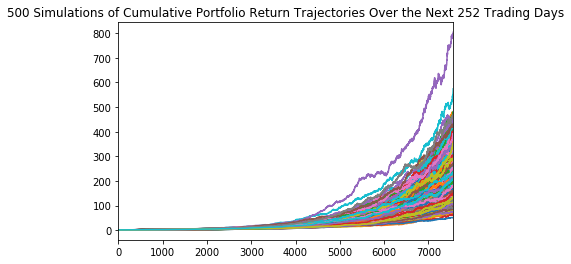

In [38]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [39]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head

<bound method NDFrame.head of 0      192.769939
1      171.963857
2      177.992293
3      138.460439
4      175.622694
5      406.595515
6      102.234885
7      209.318807
8      178.367586
9      153.115371
10     219.828360
11     238.702013
12      94.962986
13     125.807079
14     392.194544
15     220.314350
16     142.695364
17     131.589251
18     257.459697
19     102.827072
20      94.083128
21     405.630045
22      96.894687
23     387.660305
24     364.365820
25     269.635786
26     113.947745
27     226.309336
28     170.521336
29     142.506761
          ...    
470    110.421177
471    217.792254
472    200.398061
473    199.290507
474    107.801090
475    118.362122
476    141.870339
477    174.370868
478    115.615700
479    180.796258
480    174.300294
481    285.445128
482    230.550932
483    300.615055
484    215.472164
485    270.108095
486    252.327310
487    126.409246
488    292.876901
489    235.366495
490    206.850892
491    209.781981
492    200.64452

In [40]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
ending_cumulative_returns_20 = portfolio_cumulative_returns.iloc[5041,:]
ending_cumulative_returns_20

0      33.444689
1      30.894574
2      27.873291
3      25.001603
4      47.062184
5      69.770592
6      22.732214
7      32.031602
8      29.444014
9      25.014797
10     46.241164
11     38.443609
12     16.402505
13     23.240484
14     41.651285
15     63.469662
16     27.225828
17     23.632422
18     43.391874
19     23.605168
20     25.526274
21     72.469534
22     18.933692
23     49.729023
24     41.010374
25     39.853275
26     19.756492
27     30.719943
28     37.056515
29     28.487213
         ...    
470    25.581604
471    43.695953
472    41.065541
473    30.408953
474    19.661652
475    20.607697
476    25.962141
477    31.794190
478    20.651233
479    32.893440
480    35.717055
481    39.739935
482    50.108699
483    40.885547
484    44.993487
485    42.087354
486    40.061481
487    38.845612
488    41.527950
489    50.704088
490    34.605947
491    27.836133
492    33.339705
493    24.624510
494    31.460310
495    64.595648
496    39.659986
497    73.2453

In [41]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    102.825245
0.95    379.342101
Name: 7560, dtype: float64

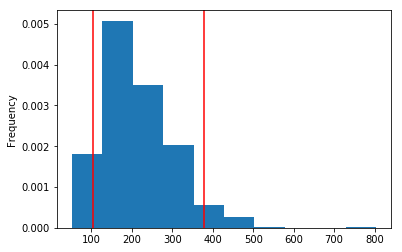

In [42]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [43]:
# YOUR CODE HERE
percentile_10th = np.percentile(ending_cumulative_returns, 10)
percentile_10th

119.02985783731046

In [44]:
percentile_50th = np.percentile(ending_cumulative_returns, 50)
percentile_50th

199.0899699441323

In [45]:
percentile_90th = np.percentile(ending_cumulative_returns, 90)
percentile_90th

320.54983094157365

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [46]:
# YOUR CODE HERE
expected_return_10 = 20000 + (20000 * percentile_10th)
expected_return_10

2400597.156746209

In [47]:
expected_return_50 = 20000 + (20000 * percentile_50th)
expected_return_50

4001799.3988826456

In [48]:
expected_return_90 = 20000 + (20000 * percentile_90th)
expected_return_90

6430996.6188314725

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [49]:
# YOUR CODE HERE

projected_yearly_income = 6085
withdraw_rate_4 = expected_return_10 * 0.04
retirement = withdraw_rate_4 - projected_yearly_income 
retirement

89938.88626984837

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [50]:
# YOUR CODE HERE
expected_return_10_50 = 30000 + (30000 * percentile_10th)
expected_return_10_50
projected_yearly_income = 6085
withdraw_rate_4 = expected_return_10_50 * 0.04
retirement = withdraw_rate_4 - projected_yearly_income 
retirement

137950.82940477255

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

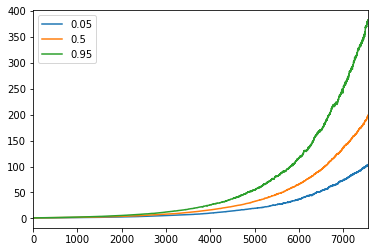

In [51]:
confidence_interval_optional = portfolio_cumulative_returns.quantile([0.05, 0.5, 0.95], axis=1).transpose()
confidence_interval_optional.plot()

**HAROLD LOVES RISK**

In [59]:
# Set the portfolio weights (80% SPY (stocks); 20% AGG (bonds))
weights_RISK = [0.2, 0.8]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
portfolio_daily_returns = simulated_daily_returns.dot(weights_RISK)
    
    # Calculate the normalized, cumulative return series
portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head(15)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996843,0.999008,0.995367,1.000397,1.012342,1.010130,0.996505,1.000728,1.010624,1.012490,...,0.998484,1.007499,1.010418,1.003011,0.991617,0.996755,1.007782,1.002387,0.994367,0.996361
2,0.999043,0.999024,0.996192,1.005303,1.008837,1.006938,0.995248,0.998291,1.019182,1.008016,...,1.001571,1.007128,1.013536,1.013082,0.994618,0.989905,1.013992,1.000732,0.994951,1.012228
3,0.993968,0.997019,0.996816,1.006736,1.010268,1.012935,0.994629,1.000372,1.023057,1.006325,...,1.006877,1.007426,1.015806,1.009254,0.984450,0.998607,1.016249,0.996268,1.004078,1.018732
4,1.001468,0.993934,0.995279,1.011144,1.005963,1.020848,1.000627,0.992154,1.026933,1.009787,...,1.008476,1.017659,1.024718,1.016194,0.986391,1.006905,1.017386,0.995823,1.002472,1.014858
5,1.012237,0.998650,0.999573,1.015602,1.004517,1.008681,0.995578,0.995287,1.028663,1.015806,...,1.005956,1.019237,1.027467,1.011978,0.985048,1.003352,1.015242,0.987050,1.006799,1.006587
6,1.022941,1.004357,0.996036,1.023904,1.017295,1.015913,0.995717,1.001561,1.025682,1.012157,...,1.020395,1.023324,1.029024,1.015864,0.978241,1.003459,1.019221,0.989952,1.005869,1.009294
7,1.024524,0.998780,0.998020,1.027714,1.015819,1.023605,0.997185,1.005843,1.023860,1.012388,...,1.024326,1.019214,1.034524,1.021206,0.978130,1.003592,1.016569,0.995878,1.009387,1.005743
8,1.033627,1.000388,1.004051,1.032672,1.008455,1.015961,0.997303,1.002235,1.022046,1.012819,...,1.029444,1.016605,1.035096,1.016069,0.981000,1.001657,1.023109,0.991384,1.003215,0.999900
9,1.033938,1.001798,1.006220,1.031134,1.009415,1.013957,0.985715,1.000708,1.019685,1.015271,...,1.038808,1.017917,1.035722,1.016732,0.982211,1.003494,1.026282,0.997641,1.003167,1.005828


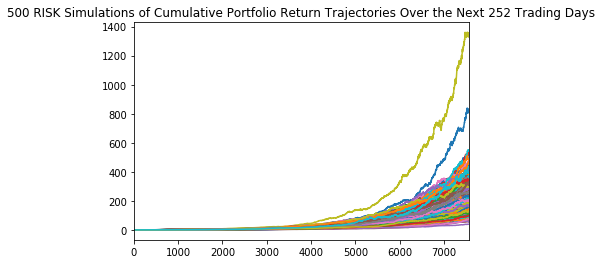

In [60]:
# Visualize the Simulation RISK!
# YOUR CODE HERE
plot_title = f"{n+1} RISK Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [54]:
# Display the 90% confidence interval for the ending returns RISK
# YOUR CODE HERE
confidence_interval_RISK = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    102.825245
0.95    379.342101
Name: 7560, dtype: float64

**HAROLD DOES NOT HAVE TO WORRY THAT MUCH ABOUT RETIREMENT AS CAN BE DERIVED FROM ABOVE (EVEN WITH A 20K STARTER, MILLIONS!), DEPENDING ON HIS DESIRES, HE COULD REITRE IN 5!**